# Damped Harmonic Oscillator

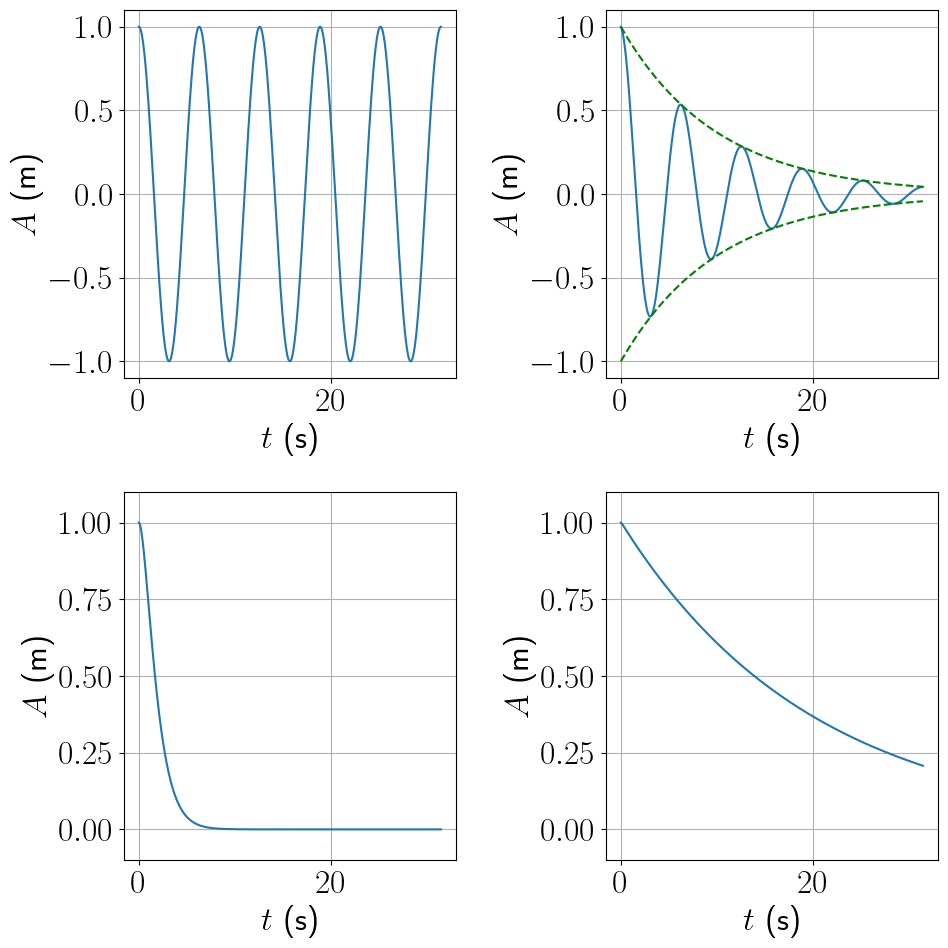

In [4]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['figure.autolayout'] = True
matplotlib.rcParams['font.family'] ='sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Arial'
matplotlib.rcParams['font.size'] = 24
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def harmonic_oscillator( t, omega0, x0, phi0 ):
    return x0 * np.cos( omega0 * t + phi0 )

def envelope( t, gamma ):
    return np.exp( -gamma*t )

def underdamped( t, omega0, gamma, x0, phi0 ):
    omega = np.sqrt( omega0**2 - gamma**2 )
    return envelope( t, gamma ) * harmonic_oscillator( t, omega, x0, phi0 )
    
def critically_damped( t, gamma, x0 ):
    return x0 * envelope( t, gamma ) * ( 1 + gamma*t )

def overdamped( t, omega0, gamma, x0 ):
    alpha = np.sqrt( gamma**2 - omega0**2 )
    return x0/alpha * envelope( t, gamma ) * ( alpha*np.cosh( alpha*t ) + gamma*np.sinh( alpha*t ) )

# angular frequency and period
omega0 = 1
T = 2*np.pi/omega0

# amplitude
A = 1

# phase
phi0 = 0

# damping
gamma1 = 0.1*omega0
gamma2 = omega0
gamma3 = 10*omega0

t = np.linspace( 0, 5*T, 500 )

ho       = harmonic_oscillator( t, omega0, A, phi0 )
underd   = underdamped( t, omega0, gamma1, A, phi0 )
env      = envelope( t, gamma1 )
critical = critically_damped( t, gamma2, A )
overd    = overdamped( t, omega0, gamma3, A )

# plot displacement vs time
fig,ax = plt.subplots( 2, 2, figsize=(10,10) )

ax[0][0].plot( t, ho )
ax[0][1].plot( t, underd )
ax[0][1].plot( t, env, "g--" )
ax[0][1].plot( t, -env, "g--" )
ax[1][0].plot( t, critical )
ax[1][1].plot( t, overd )

# axis labels
ax[0][0].set_xlabel( r'$t$ (s)' )
ax[0][0].set_ylabel( r'$A$ (m)' )
ax[0][0].set_ylim(-1.1,1.1)
ax[0][0].grid( True )

ax[0][1].set_xlabel( r'$t$ (s)' )
ax[0][1].set_ylabel( r'$A$ (m)' )
ax[0][1].set_ylim(-1.1,1.1)
ax[0][1].grid( True )

ax[1][0].set_xlabel( r'$t$ (s)' )
ax[1][0].set_ylabel( r'$A$ (m)' )
ax[1][0].set_ylim(-0.1,1.1)
ax[1][0].grid( True )

ax[1][1].set_xlabel( r'$t$ (s)' )
ax[1][1].set_ylabel( r'$A$ (m)' )
ax[1][1].set_ylim(-0.1,1.1)
ax[1][1].grid( True )

# save and show
plt.savefig( 'damped_harmonic_oscillator.pdf' )
plt.show()
